What is a Feedforward Neural Network?
A Feedforward Neural Network (FNN) is a type of artificial neural network where connections between the nodes do not form cycles. This characteristic differentiates it from recurrent neural networks (RNNs). The network consists of an input layer, one or more hidden layers, and an output layer. Information flows in one direction—from input to output—hence the name "feedforward."

Training a Feedforward Neural Network
Training a Feedforward Neural Network involves adjusting the weights of the neurons to minimize the error between the predicted output and the actual output. This process is typically performed using backpropagation and gradient descent.

Forward Propagation: During forward propagation, the input data passes through the network, and the output is calculated.
Loss Calculation: The loss (or error) is calculated using a loss function such as Mean Squared Error (MSE) for regression tasks or Cross-Entropy Loss for classification tasks.
Backpropagation: In backpropagation, the error is propagated back through the network to update the weights. The gradient of the loss function with respect to each weight is calculated, and the weights are adjusted using gradient descent.

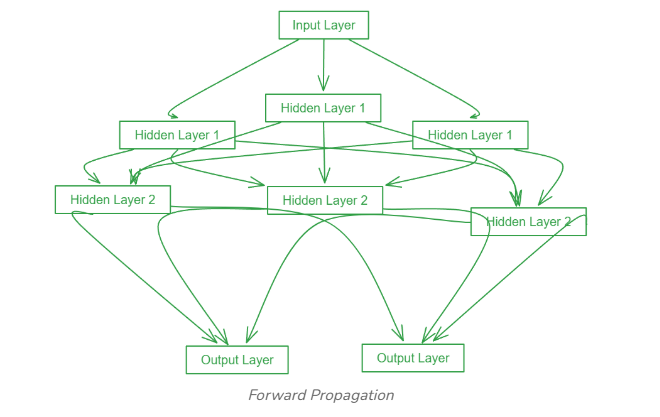

Gradient Descent
Gradient Descent is an optimization algorithm used to minimize the loss function by iteratively updating the weights in the direction of the negative gradient. Common variants of gradient descent include:

Batch Gradient Descent: Updates weights after computing the gradient over the entire dataset.
Stochastic Gradient Descent (SGD): Updates weights for each training example individually.
Mini-batch Gradient Descent: Updates weights after computing the gradient over a small batch of training examples.

In [19]:
import numpy as np


In [20]:
import matplotlib.pyplot as plt
import pandas as pd


In [21]:
df_train = pd.read_csv(r"D:\MSAIM\trimister-3 msaiml\Deep_learning\datasets\mnist_train.csv")
df_test = pd.read_csv(r"D:\MSAIM\trimister-3 msaiml\Deep_learning\datasets\mnist_test.csv")


In [22]:
df_train.iloc[:, 1:].head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
x_train = df_train.iloc[:, 1:].values
y_train = df_train['label'].values

In [24]:
x_test = df_test.iloc[:, 1:].values
y_test = df_test['label'].values
x_test = x_test / 255 
#  normalize the data

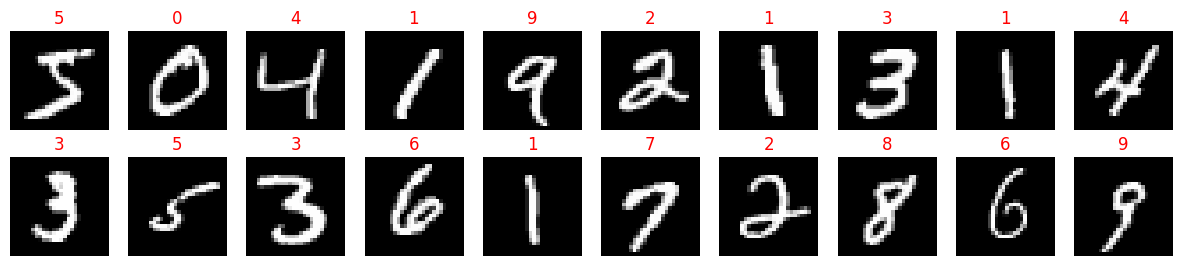

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 3))  # Set figure size

for i in range(20):
    plt.subplot(2, 10, i + 1)  # 1 row, 10 columns
    digit_image = x_train[i].reshape(28, 28)
    plt.imshow(digit_image, cmap='gray')
    plt.axis('off')
    plt.title(y_train[i], fontsize=12, color='red')  # Display label as title

plt.show()  # Show all images in one row


with out normaization

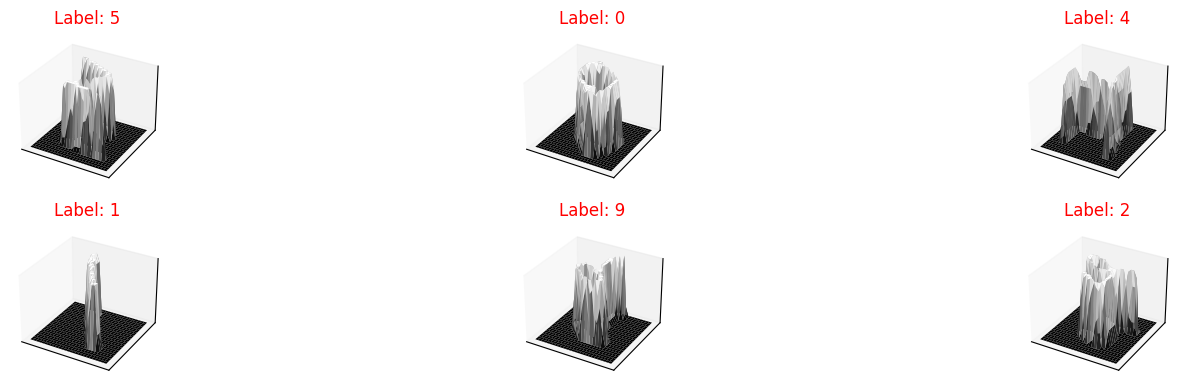

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 4))  # Adjust figure size for horizontal layout

for i in range(6):  # Loop from 0 to 5
    digit_image = x_train[i].reshape(28, 28)
    
    # Create X, Y coordinate grids
    x = np.arange(28)
    y = np.arange(28)
    X, Y = np.meshgrid(x, y)

    ax = fig.add_subplot(2, 3, i+1, projection='3d')  # 1 row, 6 columns
    ax.plot_surface(X, Y, digit_image, cmap='gray', edgecolor='none')
    
    # Labels
    ax.set_title(f'Label: {y_train[i]}', fontsize=12, color='red')
    ax.set_xticks([])  # Hide ticks
    ax.set_yticks([])
    ax.set_zticks([])

plt.tight_layout()
plt.show()


 The input layer of the network contains neurons encoding the
 values of the input pixels. our training data for the network will consist of many  by  pixel
 images of scanned handwritten digits, and so the input layer
 contains  neurons.

In [27]:
x_train_normalized = x_train / 255.0

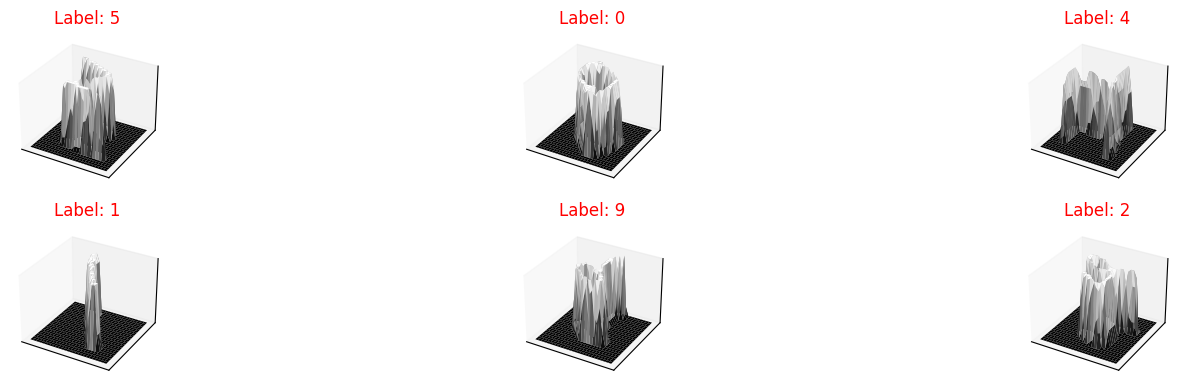

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 4))  # Adjust figure size for horizontal layout

for i in range(6):  # Loop from 0 to 5
    digit_image = x_train_normalized[i].reshape(28, 28)
    
    # Create X, Y coordinate grids
    x = np.arange(28)
    y = np.arange(28)
    X, Y = np.meshgrid(x, y)

    ax = fig.add_subplot(2, 3, i+1, projection='3d')  # 1 row, 6 columns
    ax.plot_surface(X, Y, digit_image, cmap='gray', edgecolor='none')
    
    # Labels
    ax.set_title(f'Label: {y_train[i]}', fontsize=12, color='red')
    ax.set_xticks([])  # Hide ticks
    ax.set_yticks([])
    ax.set_zticks([])

plt.tight_layout()
plt.show()


In [29]:
x_train[1] 

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

How Does the Scaling Work?
Each pixel intensity p in the original image (0 to 255) is scaled as:


​
 
0 remains 0, and 255 becomes 1.
Intermediate values (e.g., 127) get mapped to 127/255 ≈ 0.498.

Normalization ensures that pixel values are in a standardized range, leading to faster, more stable, and efficient model training.

Original Pixel Value	Normalized Value
0 (black)	0.0
127 (gray)	~0.5
255 (white)	1.0

In [30]:
print(x_train_normalized[1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [31]:
# %pip install tensorflow h5py --upgrade

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Build the model
model = Sequential([
    # Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])



In [33]:
# Train the model
model.fit(x_train_normalized, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.4132 - sparse_categorical_accuracy: 0.8804
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1033 - sparse_categorical_accuracy: 0.9689
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0678 - sparse_categorical_accuracy: 0.9789
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0533 - sparse_categorical_accuracy: 0.9830
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0405 - sparse_categorical_accuracy: 0.9874


In [34]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0945 - sparse_categorical_accuracy: 0.9737

Test accuracy: 0.9786999821662903


In [35]:
history = model.fit(x_train_normalized, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0322 - sparse_categorical_accuracy: 0.9893 - val_loss: 0.0885 - val_sparse_categorical_accuracy: 0.9722
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0259 - sparse_categorical_accuracy: 0.9910 - val_loss: 0.0850 - val_sparse_categorical_accuracy: 0.9758
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0202 - sparse_categorical_accuracy: 0.9935 - val_loss: 0.0824 - val_sparse_categorical_accuracy: 0.9788
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0187 - sparse_categorical_accuracy: 0.9935 - val_loss: 0.0935 - val_sparse_categorical_accuracy: 0.9780
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0163 - sparse_categorical_accuracy: 0.9946 - val_loss: 0.1094 - val_sparse_categorical_accuracy: 0.9763
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0140 - sparse_categorical_accuracy: 0.9947 - val_loss: 0.1010 - val_sparse_categorical_accuracy:

In [36]:
loss_history = history.history['loss']
weights_history = []

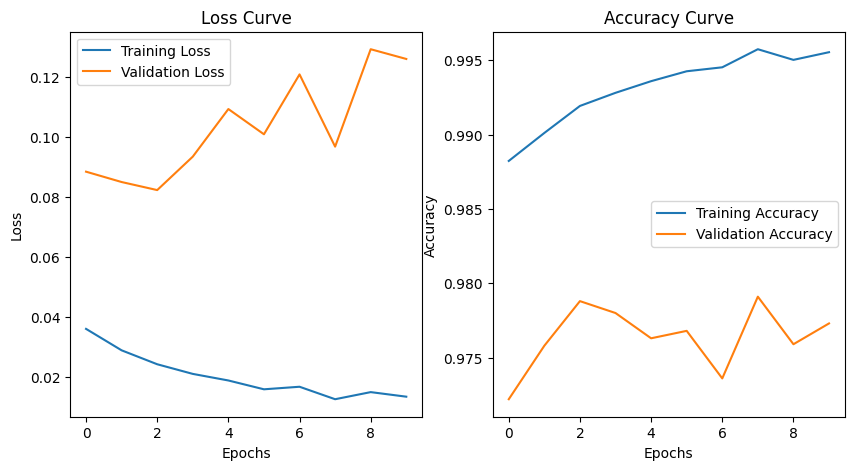

In [37]:

# Plot training & validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()


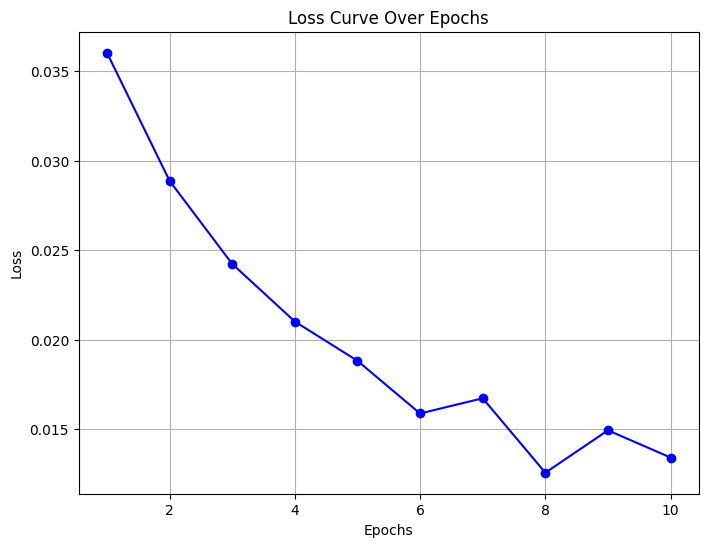

In [41]:
epochs = range(1, len(loss_history) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss_history, marker='o', linestyle='-', color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve Over Epochs")
plt.grid()
plt.show()


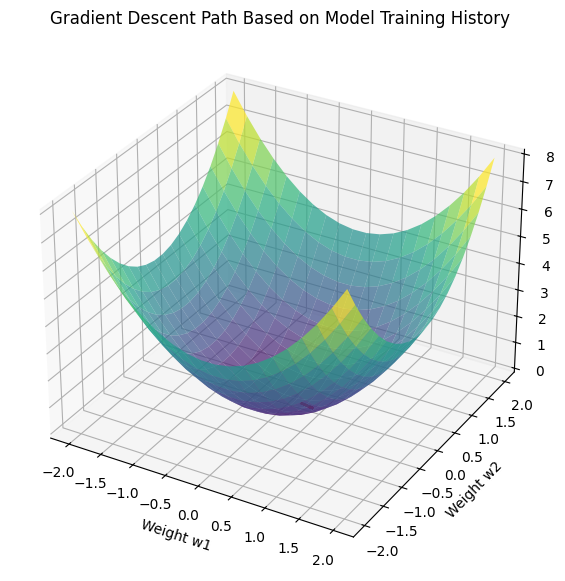

In [42]:
from mpl_toolkits.mplot3d import Axes3D
# Store model weights after each epoch
for epoch in range(len(loss_history)):
    weights_history.append(model.get_weights())

# Define a simple loss surface (as an approximation for the sake of visualization)
def loss_surface(w1, w2):
    return w1**2 + w2**2  # Simple convex loss function

# Compute the gradients (Jacobian-like) - here it's just the gradient of the loss function
def gradient(w1, w2):
    dL_dw1 = 2 * w1  # Derivative with respect to w1
    dL_dw2 = 2 * w2  # Derivative with respect to w2
    return np.array([dL_dw1, dL_dw2])

# Create a grid of weights (w1, w2) for visualization
w1_vals = np.linspace(-2, 2, 20)
w2_vals = np.linspace(-2, 2, 20)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = loss_surface(W1, W2)

# Set up the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the loss surface
ax.plot_surface(W1, W2, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# Loop through the training history and extract weight values after each epoch
for epoch in range(1, len(loss_history)):
    # Get model weights after this epoch
    model.set_weights(weights_history[epoch])

    # Extract weights (Assume 2D weight matrix for this simple case)
    w1, w2 = model.layers[1].get_weights()[0][0, 0], model.layers[1].get_weights()[0][1, 0]  # Adjust based on your model's structure

    # Plot the gradient descent path using arrows (Jacobian-like direction)
    grad = gradient(w1, w2)  # Compute gradients based on the weights
    ax.quiver(w1, w2, loss_surface(w1, w2), grad[0], grad[1], -0.2, length=0.2, normalize=True, color='r')

# Labels and title
ax.set_xlabel("Weight w1")
ax.set_ylabel("Weight w2")
ax.set_zlabel("Loss Value")
ax.set_title("Gradient Descent Path Based on Model Training History")

plt.show()


In [43]:
import plotly.graph_objects as go
# Create a Plotly contour plot
fig = go.Figure(data=go.Contour(
    z=Z,
    x=w1_vals,
    y=w2_vals,
    colorscale='Viridis',
    colorbar=dict(title='Loss Value'),
))

# Loop through the training history and extract weight values after each epoch
for epoch in range(1, len(loss_history)):
    # Get model weights after this epoch
    model.set_weights(weights_history[epoch])

    # Extract weights (Assume 2D weight matrix for this simple case)
    w1, w2 = model.layers[1].get_weights()[0][0, 0], model.layers[1].get_weights()[0][1, 0]  # Adjust based on your model's structure

    # Compute gradients (steepest descent: negative gradient)
    grad = gradient(w1, w2)
    grad_norm = np.linalg.norm(grad)  # To normalize the gradient direction
    grad = -grad / grad_norm  # Steepest descent direction (negative gradient)

    # Add an arrow showing the steepest descent direction
    fig.add_trace(go.Scatter(
        x=[w1],
        y=[w2],
        mode='markers+text',
        marker=dict(color='red', size=8),
        text=['Epoch {}'.format(epoch)],
        textposition='top center'
    ))

    # Add an arrow indicating the steepest descent direction
    fig.add_trace(go.Scatter(
        x=[w1, w1 + grad[0] * 0.2],
        y=[w2, w2 + grad[1] * 0.2],
        mode='lines+text',
        line=dict(color='red', width=2),
        text=[''],
        textposition='top center'
    ))

# Labels and title
fig.update_layout(
    title="Steepest Descent Path with Contour Plot",
    xaxis_title="Weight w1",
    yaxis_title="Weight w2",
    showlegend=False
)

fig.show()

In [ ]:
model.fit(x_train_normalized, y_train, epochs=6)
test_loss, test_acc = model.evaluate(x_test, y_test)


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0093 - sparse_categorical_accuracy: 0.9970
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0088 - sparse_categorical_accuracy: 0.9971
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0090 - sparse_categorical_accuracy: 0.9968
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0076 - sparse_categorical_accuracy: 0.9974
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0111 - sparse_categorical_accuracy: 0.9965
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0076 - sparse_categorical_accuracy: 0.9977
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1667 - sparse_categorical_accuracy: 0.9746


In [61]:
print(f'\nFinal Test accuracy: {test_acc}')
print(f'\nFinal Test loss: {test_loss}')




Final Test accuracy: 0.982200026512146

Final Test loss: 0.28676551580429077
